# Regularization

In [63]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [64]:
x,y=make_moons(2000,noise=0.2,random_state=2)

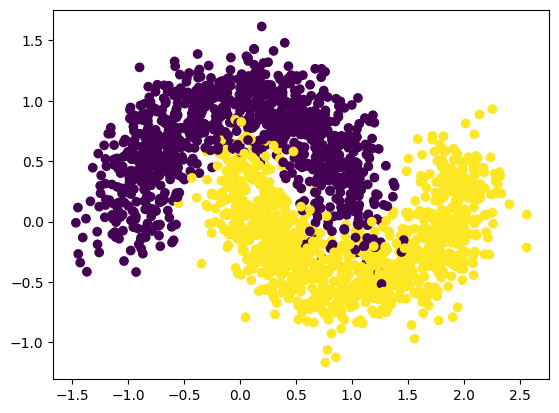

In [65]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [66]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense

In [67]:
model1=Sequential()

model1.add(Dense(32,input_dim=2,activation='relu'))
model1.add(Dense(16,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 32)                96        
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dense_28 (Dense)            (None, 1)                 17        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [68]:
adam=Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history1=model1.fit(x,y,epochs=20,validation_split=0.2,)

Epoch 1/20
50/50 [==============================] - 1s 7ms/step - loss: 0.3647 - accuracy: 0.8413 - val_loss: 0.2947 - val_accuracy: 0.8625
Epoch 2/20
50/50 [==============================] - 0s 4ms/step - loss: 0.2557 - accuracy: 0.8931 - val_loss: 0.2607 - val_accuracy: 0.9025
Epoch 3/20
50/50 [==============================] - 0s 5ms/step - loss: 0.1935 - accuracy: 0.9244 - val_loss: 0.1671 - val_accuracy: 0.9400
Epoch 4/20
50/50 [==============================] - 0s 5ms/step - loss: 0.1450 - accuracy: 0.9456 - val_loss: 0.1359 - val_accuracy: 0.9550
Epoch 5/20
50/50 [==============================] - 0s 5ms/step - loss: 0.1136 - accuracy: 0.9588 - val_loss: 0.1209 - val_accuracy: 0.9575
Epoch 6/20
50/50 [==============================] - 0s 5ms/step - loss: 0.1012 - accuracy: 0.9581 - val_loss: 0.1187 - val_accuracy: 0.9500
Epoch 7/20
50/50 [==============================] - 0s 4ms/step - loss: 0.1128 - accuracy: 0.9488 - val_loss: 0.1178 - val_accuracy: 0.9475
Epoch 8/20
50/50 [==

In [69]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 16s 2ms/step


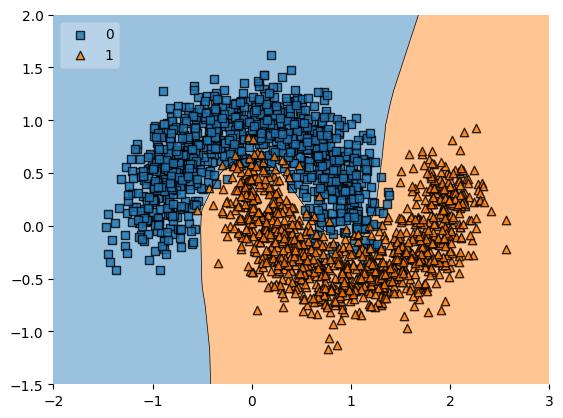

In [70]:
plot_decision_regions(x,y.astype('int'),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

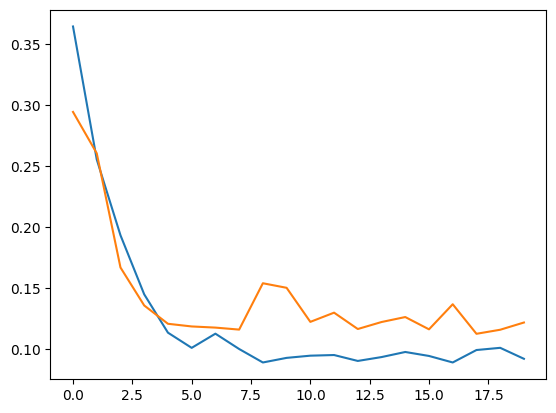

In [71]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [72]:
from keras.regularizers import l1

In [73]:
model2=Sequential()
model2.add(Dense(32,input_dim=2,activation='relu',kernel_regularizer=l1(0.001)))
model2.add(Dense(16,activation='relu',kernel_regularizer=l1(0.0001)))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 32)                96        
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dense_31 (Dense)            (None, 1)                 17        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [74]:
from keras.optimizers import Adam
adam=Adam(learning_rate=0.01)
model2.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
history2=model2.fit(x,y,epochs=20,validation_split=0.2)

Epoch 1/20
50/50 [==============================] - 1s 8ms/step - loss: 0.3939 - accuracy: 0.8400 - val_loss: 0.3028 - val_accuracy: 0.8750
Epoch 2/20
50/50 [==============================] - 0s 6ms/step - loss: 0.2650 - accuracy: 0.9069 - val_loss: 0.2391 - val_accuracy: 0.9175
Epoch 3/20
50/50 [==============================] - 0s 5ms/step - loss: 0.2003 - accuracy: 0.9344 - val_loss: 0.1955 - val_accuracy: 0.9375
Epoch 4/20
50/50 [==============================] - 0s 6ms/step - loss: 0.1652 - accuracy: 0.9463 - val_loss: 0.1750 - val_accuracy: 0.9500
Epoch 5/20
50/50 [==============================] - 0s 6ms/step - loss: 0.1416 - accuracy: 0.9575 - val_loss: 0.1498 - val_accuracy: 0.9575
Epoch 6/20
50/50 [==============================] - 0s 6ms/step - loss: 0.1314 - accuracy: 0.9644 - val_loss: 0.1550 - val_accuracy: 0.9550
Epoch 7/20
50/50 [==============================] - 0s 6ms/step - loss: 0.1309 - accuracy: 0.9638 - val_loss: 0.1450 - val_accuracy: 0.9575
Epoch 8/20
50/50 [==

9600/9600 [==============================] - 16s 2ms/step


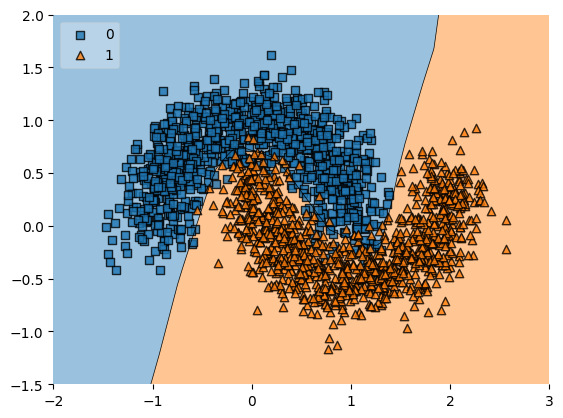

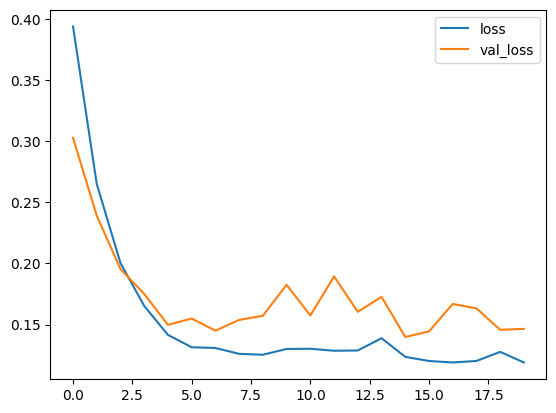

In [75]:
plot_decision_regions(x,y.astype('int'),clf=model2,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['loss','val_loss'])

In [76]:
acc_model1=history1.history['accuracy'][-1]*100
acc_model2=history2.history['accuracy'][-1]*100
print(f"Accuracy of model1 : {acc_model1}")
print(f"Accuracy of model2 : {acc_model2}")

Accuracy of model1 : 96.31249904632568
Accuracy of model2 : 96.37500047683716
